<h1>Data Wrangling We Rate Dogs Twitter Archive</h1>

By Kevin Green

<h2>Introduction</h2>

<h4>Used Libraries</h4>

In [282]:
import pandas as pd
import requests as request
import json
import numpy as np
import matplotlib.pyplot as plt

<h2>Gather</h2>

<h4>From file as Given</h3>

In [283]:
archive = pd.read_csv('twitter-archive-enhanced.csv', encoding = 'utf-8');
archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


<h4>From file downloaded programmatically</h4>

In [284]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = request.get(url)
with open(url.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(response.content)
programmatic = pd.read_csv('image-predictions.tsv', sep='\t', encoding='utf-8');
programmatic.head(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


<h4> Using Twitter's API </h4>

I was unable to complete Twitter's process for a development account and obtain keys from them, therefore the API request and response were provided to me instead by rick@udacity.com. In theory our request would look something like this but with the proper keys:

In [285]:
'''
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df_1.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))        
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start) 
print(fails_dict)
''''

SyntaxError: EOL while scanning string literal (<ipython-input-285-f998d97e6b04>, line 40)

This outputs the "tweet_json.txt" file which we can later use to store it in a data frame.
"Then read this tweet_json.txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count."


In [286]:
col = ["tweet_id","retweet_count","favorite_count"];
with open('tweet_json.txt') as f:
    lines = f.readlines()
preList = []
for line in lines:
    preList.append(json.loads(line)['id']);
    preList.append(json.loads(line)['retweet_count']);
    preList.append(json.loads(line)['favorite_count']);
api = pd.DataFrame(np.array(preList).reshape(int(len(preList)/3),3), columns = col)
api.head(10)


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


<h2>Gather Summary</h2>

<h2>Assess</h2>



In [287]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [288]:
programmatic

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [289]:
archive['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
Sadie          8
the            8
Buddy          7
Daisy          7
Toby           7
an             7
Bailey         7
Scout          6
Koda           6
Jax            6
Leo            6
Dave           6
Oscar          6
Milo           6
Stanley        6
Bella          6
Rusty          6
Jack           6
Alfie          5
            ... 
Lassie         1
Kody           1
Jim            1
Mimosa         1
Damon          1
Harvey         1
Bodie          1
Fynn           1
Pupcasso       1
Asher          1
Bruiser        1
Godzilla       1
Rupert         1
Hermione       1
Oreo           1
Jaspers        1
Sunshine       1
Gabby          1
Cal            1
Tom            1
Aja            1
Maisey         1
Rudy           1
Millie         1
Major          1
Genevieve      1
Skye           1
Bilbo         

In [290]:
api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848
8,890609185150312448,4429,28226
9,890240255349198849,7711,32467


In [291]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [292]:
programmatic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [293]:
api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


<h2>Quality</h2>

<h4>Archive Dataset</h4>
1) tweet_id, in_reply_to_status_id amd in_reply_to_user_id can be integer

2) timestamp can be date instead of object type

3) There are reweets we need to git rid of

4) There are numerators that are incredibly high, we can replace with 13 and 10

5) 'doggo','floofer','pupper','puppo' has "None" values instead of null 

<h4>Programmatic Dataset</h4>
6) Some tweets that are not related to images

7) There are 2356 tweets however the images only data frame (programmatic) only contains 2075 records, we will get rid of none image tweets

<h4>API Dataset</h4>
8) This data frame contains 2354 while there are 2356 instances of tweets

<h2>Tideness</h2>
9) Since we will get rid of retweets, we can drop 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'

10) The data sets could be joined in 1

11) doggo floofer pupper puppo in multiple columns

<h2>Clean</h2>

In [294]:
#Copies are made before cleaning
archive_copy = archive.copy();
programmatic_copy = programmatic.copy();
api_copy = api.copy();

<h4>1) tweet_id, in_reply_to_status_id amd in_reply_to_user_id should be integer</h4>

<h5>Define</h5>

Convert tweet_id, in_reply_to_status_id amd in_reply_to_user_id to int64

<h5>Code</h5>

In [295]:
temp  = np.array(archive_copy.in_reply_to_status_id, dtype=np.int64)
archive_copy.in_reply_to_status_id=temp
temp  = np.array(archive_copy.in_reply_to_user_id, dtype=np.int64)
archive_copy.in_reply_to_user_id=temp

<h5>Test</h5>

In [296]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null int64
in_reply_to_user_id           2356 non-null int64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(5), ob

<h4>2) Timestamp should be date instead of object type</h4>

<h5>Define</h5>

Convert Timestamp to date

<h5>Code</h5>

In [297]:
archive_copy.timestamp=pd.to_datetime(archive_copy.timestamp)

<h5>Test</h5>

In [298]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null int64
in_reply_to_user_id           2356 non-null int64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

<h4>3) There are retweets we do not need</h4>

<h5>Define</h5>

We will get rid of retweets

<h5>Code</h5>

In [299]:
archive_copy=archive_copy[archive.tweet_id.notnull()]
archive_copy=archive_copy[archive.retweeted_status_id.isnull()]

<h5>Test</h5>

In [300]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         2175 non-null int64
in_reply_to_user_id           2175 non-null int64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

<h4>4) There are numerators that are incredibly high</h4>

<h5>Define</h5>

We will replace numerators with 3 digits for 13

<h5>Code</h5>

In [301]:
archive_copy.rating_numerator=archive_copy.rating_numerator.replace(1776,13)
archive_copy.rating_numerator=archive_copy.rating_numerator.replace(960,13)
archive_copy.rating_numerator=archive_copy.rating_numerator.replace(666,13)
archive_copy.rating_numerator=archive_copy.rating_numerator.replace(420,13)
archive_copy.rating_numerator=archive_copy.rating_numerator.replace(204,13)
archive_copy.rating_numerator=archive_copy.rating_numerator.replace(182,13)
archive_copy.rating_numerator=archive_copy.rating_numerator.replace(165,13)
archive_copy.rating_numerator=archive_copy.rating_numerator.replace(144,13)
archive_copy.rating_numerator=archive_copy.rating_numerator.replace(143,13)
archive_copy.rating_numerator=archive_copy.rating_numerator.replace(121,13)

<h5>Test</h5>

In [302]:
archive_copy.sort_values(by='rating_numerator', ascending=False)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1228,713900603437621249,-9223372036854775808,-9223372036854775808,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1843,675853064436391936,-9223372036854775808,-9223372036854775808,2015-12-13 01:41:41,"<a href=""http://twitter.com/download/iphone"" r...",Here we have an entire platoon of puppers. Tot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675853064...,88,80,None,None,None,None,None
433,820690176645140481,-9223372036854775808,-9223372036854775808,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
1254,710658690886586372,-9223372036854775808,-9223372036854775808,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None
695,786709082849828864,-9223372036854775808,-9223372036854775808,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
1351,704054845121142784,-9223372036854775808,-9223372036854775808,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
1202,716439118184652801,-9223372036854775808,-9223372036854775808,2016-04-03 01:36:11,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1274,709198395643068416,-9223372036854775808,-9223372036854775808,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1433,697463031882764288,-9223372036854775808,-9223372036854775808,2016-02-10 16:51:59,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697463031...,44,40,None,None,None,None,None
763,778027034220126208,-9223372036854775808,-9223372036854775808,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None


<h4>5) 'doggo','floofer','pupper','puppo' has "None" values instead of null</h4>

<h5>Define</h5>

None can be replaced with null

<h5>Code</h5>

In [303]:
archive_copy.doggo=archive_copy.doggo.replace('None','')
archive_copy.floofer=archive_copy.floofer.replace('None','')
archive_copy.pupper=archive_copy.pupper.replace('None','')
archive_copy.puppo=archive_copy.puppo.replace('None','')

<h5>Test</h5>

In [304]:
archive_copy.loc[archive_copy['doggo'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


<h4>6) Some tweets that are not related to images<br>7) There are 2356 tweets however the images only data frame (programmatic) only contains 2075 records, we will get rid of none image tweets<br>10) The data sets could be joined in 1</h4> 

<h5>Define</h5>

We can address these 4 observations by creating a left join between the data frame obtained programmatically (images data frame)

<h5>Code</h5>

In [305]:
archive_copy=archive_copy[~(archive_copy.tweet_id.duplicated())]
archive_copy.drop_duplicates();
programmatic_copy.drop_duplicates();
api_copy.drop_duplicates()
master_data=pd.merge(programmatic_copy,archive_copy,on='tweet_id',how='left')

<h5>Test</h5>

In [306]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 28 columns):
tweet_id                      2075 non-null int64
jpg_url                       2075 non-null object
img_num                       2075 non-null int64
p1                            2075 non-null object
p1_conf                       2075 non-null float64
p1_dog                        2075 non-null bool
p2                            2075 non-null object
p2_conf                       2075 non-null float64
p2_dog                        2075 non-null bool
p3                            2075 non-null object
p3_conf                       2075 non-null float64
p3_dog                        2075 non-null bool
in_reply_to_status_id         1994 non-null float64
in_reply_to_user_id           1994 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id  

<h4>8) API data frame contains 2354 while there are 2356 instances of tweets</h4>

<h5>Define</h5>

We can merge our master_data with the api_copy to get rid of mismatches

<h5>Code</h5>

In [307]:
master_data=pd.merge(master_data,api_copy,on='tweet_id',how='left')

<h5>Test</h5>

In [308]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 30 columns):
tweet_id                      2075 non-null int64
jpg_url                       2075 non-null object
img_num                       2075 non-null int64
p1                            2075 non-null object
p1_conf                       2075 non-null float64
p1_dog                        2075 non-null bool
p2                            2075 non-null object
p2_conf                       2075 non-null float64
p2_dog                        2075 non-null bool
p3                            2075 non-null object
p3_conf                       2075 non-null float64
p3_dog                        2075 non-null bool
in_reply_to_status_id         1994 non-null float64
in_reply_to_user_id           1994 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id  

<h4>9) The following columns are not need'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'</h4>

<h5>Define</h5>

We need to drop 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'

<h5>Code</h5>

In [309]:
master_data=master_data.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

<h5>Test</h5>

In [310]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 25 columns):
tweet_id              2075 non-null int64
jpg_url               2075 non-null object
img_num               2075 non-null int64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null bool
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null bool
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null bool
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 n

<h4>11) doggo floofer pupper puppo in multiple columns</h4>

<h5>Define</h5>

doggo floofer pupper puppo can be one column called "Stage"

<h5>Code</h5>

In [311]:
master_data['stage']=master_data.doggo.str.cat(master_data.floofer).str.cat(master_data.pupper).str.cat(master_data.puppo)
master_data=master_data.drop(['doggo','floofer','pupper','puppo'],axis=1)

<h5>Test</h5>

In [312]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 22 columns):
tweet_id              2075 non-null int64
jpg_url               2075 non-null object
img_num               2075 non-null int64
p1                    2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null bool
p2                    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null bool
p3                    2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null bool
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
retweet_count         2073 non-null float64
favorite_count        2073 

<h4>Save cleaned data into CSV</h4>

In [313]:
master_data.to_csv('master_data.csv')

<h4>Visualization</h4>

In [314]:
master_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03,1994.000000,1994.000000,2073.000000,2073.000000
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02,10.835507,10.532096,2976.089243,8556.718283
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02,4.732060,7.320710,5054.897526,12098.640994
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,2.000000,16.000000,0.000000
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02,10.000000,10.000000,634.000000,1674.000000
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02,11.000000,10.000000,1408.000000,3864.000000
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02,12.000000,10.000000,3443.000000,10937.000000
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01,99.000000,170.000000,79515.000000,132810.000000


In [315]:
x_values=[0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14]
x_values

[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14]

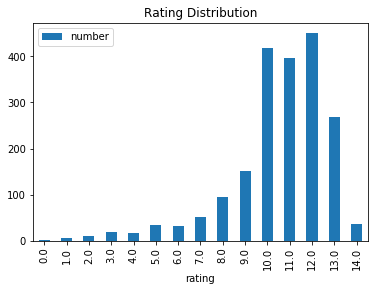

In [316]:
analysis=pd.DataFrame(columns=['rating','number','retweet','favorite'])
analysis['rating']=x_values
for x in rating_analyze['rating']:
    this_df=master_data[master_data.rating_numerator==x]
    analysis.loc[rating_analyze.rating==x,'number']=this_df['tweet_id'].count()
    analysis.loc[rating_analyze.rating==x,'retweet']=this_df.retweet_count.mean()
    analysis.loc[rating_analyze.rating==x,'favorite']=this_df.favorite_count.mean()
analysis[['rating','number']].plot(x='rating',kind='bar', title='Rating Distribution')

Insights
- Average rating: 13/10
- Most Favorite Count 132810 https://twitter.com/dog_rates/status/822872901745569793/photo/1
- Most Retweet Count 79515 https://twitter.com/dog_rates/status/744234799360020481/video/1